In [1]:
from pynq import PL
from pynq import Overlay

from pynq import DefaultHierarchy
from pynq import allocate
from doa_mts import *
o1 = doaMtsOverlay('/home/xilinx/jupyter_notebooks/DOA/doa_mts.bit')
o1.init_tile_sync()
o1.verify_clock_tree()
o1.sync_tiles()

In [2]:
from rfsoc4x2 import oled
import netifaces as ni

iface = ni.gateways()['default'][ni.AF_INET][1]
ip_address = ni.ifaddresses(iface)[2][0]['addr']
oled = oled.oled_display()
oled.write("IP Addr({}):\n{}".format(iface, ip_address))

In [3]:
import socket
import struct
import numpy as np
import netifaces as ni
from rfsoc4x2 import oled

iface = ni.gateways()['default'][ni.AF_INET][1]
ip_address = ni.ifaddresses(iface)[2][0]['addr']
oled = oled.oled_display()
oled.write("IP Addr({}):\n{}".format(iface, ip_address))

port = 4000
server_ip = ip_address  # Use the appropriate IP address or hostname
server_port = port  # Use a free port number

server_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)

# Bind the socket to the server IP and port
server_socket.setsockopt(socket.SOL_SOCKET, socket.SO_REUSEADDR, 1)
server_socket.bind((server_ip, server_port))

OSError: [Errno 98] Address already in use

In [23]:
import numpy as np
import matplotlib.pyplot as plt

fc = 5e9
min_ang = -90 # min scanning angle
max_ang = 90 # max scanning angle
scan_res = 1 # scan resolution
scan_axis = list(range(min_ang, max_ang+1, scan_res)) # angles axis
num_elements = 4
c = 299792458
lbd = c / fc
d = lbd/2


channels = 8 # 4 I + 4 Q
N = len(o1.adc_capture) // channels

# Data acq from FPGA
AlignedCaptureSamples = np.zeros((1,len(o1.adc_capture)),dtype=np.int16)
o1.internal_capture(AlignedCaptureSamples)


# server_socket.listen(1)

# # Accept a connection from the client
# client_socket, client_address = server_socket.accept()        
# print('Connected')
# data_size = 1048576

# # Pack the data as binary
# data_binary = struct.pack('h' * data_size, *AlignedCaptureSamples[0])

# # Send the data
# client_socket.sendall(data_binary)
# print('Sended')
ShapedCaptureSamples = np.zeros((channels, N), dtype=np.int16)
for i in range(channels):
    ShapedCaptureSamples[i] = AlignedCaptureSamples[0][i::channels]

iqData = np.zeros((4, N), dtype=np.cdouble)
idx = 0
for i in range(0, 8, 2):
    iqData[idx] = np.conjugate(ShapedCaptureSamples[i] + 1j * ShapedCaptureSamples[i+1])
    idx = idx + 1

rawData = iqData

from scipy.io import savemat
mdic = {"data": rawData, "label": "data"}
print(mdic)
savemat("raw_data.mat", {'complex_matrix': rawData}, oned_as='row')
savemat("AlignedCaptureSamples.mat", {'complex_matrix': AlignedCaptureSamples})#, oned_as='row')

{'data': array([[ -1. -2.j, -14. -6.j,   1. -0.j, ...,  -1. +2.j,   1. -5.j,
          1. -6.j],
       [ -8. -7.j, -14. -7.j, -12. -1.j, ...,  -9.+10.j,  -5.+10.j,
          1. -4.j],
       [-20. +6.j, -10. +7.j,   4. -5.j, ...,  -1. -6.j,  -6. -9.j,
          1. +1.j],
       [-22. +5.j, -22.+15.j,  -7. +8.j, ...,   7.+26.j,   9.+14.j,
         -1. -0.j]]), 'label': 'data'}


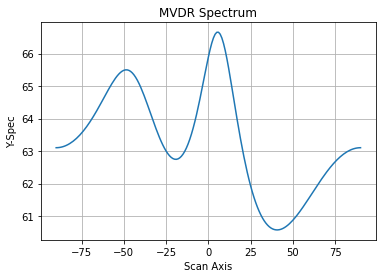

In [24]:

# x_data = np.zeros((len(rawData), 20), dtype=float)

# x_data[:, 0] = np.real(rawData[:, 0]) * np.real(rawData[:, 0])
# x_data[:, 1] = np.imag(rawData[:, 0]) * np.imag(rawData[:, 0])
# x_data[:, 2] = np.real(rawData[:, 0]) * np.real(rawData[:, 1])
# x_data[:, 3] = np.imag(rawData[:, 0]) * np.imag(rawData[:, 1])
# x_data[:, 4] = np.real(rawData[:, 0]) * np.real(rawData[:, 2])
# x_data[:, 5] = np.imag(rawData[:, 0]) * np.imag(rawData[:, 2])
# x_data[:, 6] = np.real(rawData[:, 0]) * np.real(rawData[:, 3])
# x_data[:, 7] = np.imag(rawData[:, 0]) * np.imag(rawData[:, 3])
# x_data[:, 8] = np.real(rawData[:, 1]) * np.real(rawData[:, 1])
# x_data[:, 9] = np.imag(rawData[:, 1]) * np.imag(rawData[:, 1])
# x_data[:, 10] = np.real(rawData[:, 1]) * np.real(rawData[:, 2])
# x_data[:, 11] = np.imag(rawData[:, 1]) * np.imag(rawData[:, 2])
# x_data[:, 12] = np.real(rawData[:, 1]) * np.real(rawData[:, 3])
# x_data[:, 13] = np.imag(rawData[:, 1]) * np.imag(rawData[:, 3])
# x_data[:, 14] = np.real(rawData[:, 2]) * np.real(rawData[:, 2])
# x_data[:, 15] = np.imag(rawData[:, 2]) * np.imag(rawData[:, 2])
# x_data[:, 16] = np.real(rawData[:, 2]) * np.real(rawData[:, 3])
# x_data[:, 17] = np.imag(rawData[:, 2]) * np.imag(rawData[:, 3])
# x_data[:, 18] = np.real(rawData[:, 3]) * np.real(rawData[:, 3])
# x_data[:, 19] = np.imag(rawData[:, 3]) * np.imag(rawData[:, 3])

# # Create matrix R
# R = np.zeros((4, 4), dtype=complex)
# R[0, 0] = np.sum(x_data[:, 0] + 1j * x_data[:, 1])
# R[0, 1] = np.sum(x_data[:, 2] + 1j * x_data[:, 3])
# R[0, 2] = np.sum(x_data[:, 4] + 1j * x_data[:, 5])
# R[0, 3] = np.sum(x_data[:, 6] + 1j * x_data[:, 7])
# R[1, 0] = np.conj(R[0, 1])
# R[1, 1] = np.sum(x_data[:, 8] + 1j * x_data[:, 9])
# R[1, 2] = np.sum(x_data[:, 10] + 1j * x_data[:, 11])
# R[1, 3] = np.sum(x_data[:, 12] + 1j * x_data[:, 13])
# R[2, 0] = np.conj(R[0, 2])
# R[2, 1] = np.conj(R[1, 2])
# R[2, 2] = np.sum(x_data[:, 14] + 1j * x_data[:, 15])
# R[2, 3] = np.sum(x_data[:, 16] + 1j * x_data[:, 17])
# R[3, 0] = np.conj(R[0, 3])
# R[3, 1] = np.conj(R[1, 3])
# R[3, 2] = np.conj(R[2, 3])
# R[3, 3] = np.sum(x_data[:, 18] + 1j * x_data[:, 19])

R = rawData@np.conjugate(rawData.T)

# MVDR
Rx = R  # Data covariance matrix
Rx_Inv = np.linalg.inv(Rx)  # Inverse of covariance matrix
num_elements = 4  # Define the number of elements and set its value
A = np.zeros(num_elements, dtype=complex)

# Assuming scan_axis is already defined as a numpy array
yspec = np.zeros(len(scan_axis))

# Calculate yspec
for t in range(len(scan_axis)):
    A = np.exp(-1j * 2 * np.pi * d * np.arange(num_elements) * np.sin(np.radians(scan_axis[t])) / lbd)
    B = np.conj(np.transpose(A))@Rx_Inv@A
    yspec[t] = 10 * np.log10(abs(1 / B))

# Plot data
plt.plot(scan_axis, yspec)
plt.xlabel('Scan Axis')
plt.ylabel('Y-Spec')
plt.title('MVDR Spectrum')
plt.grid(True)
plt.show()
result = scan_axis[np.argmax(yspec)]
power = round(np.max(yspec))
oled.write("Angle:{}\n Power:{}".format(result, power))

In [21]:
from scipy.io import savemat

mdic = {"rawData": iqData}
savemat("rawData.mat", mdic)

In [ ]:
mdic = {"ShapedCaptureSamples": ShapedCaptureSamples}
savemat("ShapedCaptureSamples.mat", mdic)

In [ ]:
mdic = {"AlignedCaptureSamples": AlignedCaptureSamples}
savemat("AlignedCaptureSamples.mat", mdic)

In [ ]:
while True:
    AlignedCaptureSamples = np.zeros((1,len(o1.adc_capture)),dtype=np.int16)
    o1.internal_capture(AlignedCaptureSamples)

    ShapedCaptureSamples = np.zeros((channels, N), dtype=np.int16)
    for i in range(channels):
        ShapedCaptureSamples[i] = AlignedCaptureSamples[0][i::channels]

    iqData = np.zeros((4, N), dtype=np.cdouble)
    
    idx = 0
    for i in range(0, 8, 2):
        iqData[idx] = ShapedCaptureSamples[i] + 1j * ShapedCaptureSamples[i+1]
        idx = idx + 1

    rawData = iqData
    x_data = np.zeros((len(rawData), 20), dtype=float)


    R = iqData @ np.conjugate(iqData.T)
#     print(R)
    # MVDR
    Rx = R  # Data covariance matrix
    Rx_Inv = np.linalg.inv(Rx)  # Inverse of covariance matrix
    num_elements = 4  # Define the number of elements and set its value
    A = np.zeros(num_elements, dtype=complex)

    # Assuming scan_axis is already defined as a numpy array
    yspec = np.zeros(len(scan_axis))

    # Calculate yspec
    for t in range(len(scan_axis)):
        A = np.exp(-1j * 2 * np.pi * d * np.arange(num_elements) * np.sin(np.radians(scan_axis[t])) / lbd)
        B = np.conj(A.T)@Rx_Inv@A
        yspec[t] = 10 * np.log10(abs(1 / B))

    # Plot data
    fig, ax = plt.subplots()
    ax.plot(scan_axis, yspec)
    ax.set(xlabel='Scan Axis', ylabel='Y-Spec',
       title='MVDR Spectrums')
#     plt.xlabel('Scan Axis')
#     plt.ylabel('Y-Spec')
#     plt.title('MVDR Spectrum')
    ax.grid(True)
    plt.show()
    result = scan_axis[np.argmax(yspec)]
    power = round(np.max(yspec))
    oled.write("Angle:{}\n Power:{}".format(result, power))

In [ ]:
print(len(AlignedCaptureSamples[0]))

In [33]:
import socket
import struct
import numpy as np
import netifaces as ni
from rfsoc4x2 import oled

iface = ni.gateways()['default'][ni.AF_INET][1]
ip_address = ni.ifaddresses(iface)[2][0]['addr']
oled = oled.oled_display()
oled.write("IP Addr({}):\n{}".format(iface, ip_address))

port = 4000
server_ip = ip_address  # Use the appropriate IP address or hostname
server_port = port  # Use a free port number

server_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)

# Bind the socket to the server IP and port
server_socket.setsockopt(socket.SOL_SOCKET, socket.SO_REUSEADDR, 1)
server_socket.bind((server_ip, server_port))

OSError: [Errno 98] Address already in use

In [ ]:
# Custom function to generate your Int16 array
def get_custom_data(data_size):
    # Replace this with your own custom data source or array
    AlignedCaptureSamples = np.zeros((1,data_size),dtype=np.int16)
    o1.internal_capture(AlignedCaptureSamples)
    custom_data = AlignedCaptureSamples[0]
    return custom_data

try:
    while True:
        server_socket.listen(1)
    
        # Accept a connection from the client
        client_socket, client_address = server_socket.accept()        

        # Receive and unpack the data size (number of Int16 elements) as a 16-bit integer
        data_size = struct.unpack('Q', client_socket.recv(64))[0]
        
        # Get data from ADCs
        data = get_custom_data(data_size)

        # Pack the data as binary
        data_binary = struct.pack('h' * data_size, *data)

        # Send the data
        client_socket.sendall(data_binary)
except KeyboardInterrupt:
    print("Transmission interrupted by the user.")
    server_socket.close()

In [32]:
server_socket.close()
